# Project 2 FYS-STK3155


Preface: for understanding what's going on in this raport, it is suggested you first read [1]. Some of the key aspects we will discuss, and build upon, is based directly on that earlier work. 

## 1. Introduction


## 1.1

When doing machinge learning, one crucial tasks is finding the minimum of a chosen cost function. That is, the global minimum a function evaluating the accuracy, precision, error, etc, of a model. Minimizing this cost function is equivalent to minimizing the error in the model.

We have previously found that certain cost functions (for example mean squared error (MSE)) has analytic solutions to their global minimum [1]. But this is not always the case.

When working on certain kinds of problems, the cost function is not always as simple as the MSE cost function. We will in this project make use of mini-batch gradient descent to find the minimum of a cost function (MSE), and compare the result to the analytical solution.


## 1.2

Until now we have for the most part concerned ourselves with doing regression using either analytical solutions to gradients of cost functions, or used SGD as an approximation.

We will in this part extend our arsenal of tools for these kinds of problems. And our new tool will be a feed forward neural network.

Neural networks (NN) are in essence computer models of how neurons work in the brain, though vastly simplified. In the most basic sense, NNs have an input layer, consisting of a number of nodes, receiving the data which we want to model. Thereafter, this input layer feeds this input data to a new, hidden, layer. During this process, data sent from the input layer to the hidden layer is multiplied by some weights, and a bias is added. 
This process is repeated for a given number of layers.

Eventually, the data being sent through all the hidden layers will reach an output layer. The output layer is the predictor in the NN, and here the error is calculated.

The error in the output layer is then propagated backwards through the hidden layers, adjusting the weights and the biases on the way.

When this process is done, we repeat it a given number of times (epochs).
After these epochs, we will have trained the NN, and we can make predictions with it.

In this project we want to use this NN for both regression and classification.

By classification we mean (spesifically in this case) image recognition. We will use the MNIST dataset of images. These images are hand drawn numbers between, and including, 0 and 9, each with a label indicating which number it depicts. 


## 2.1 Theroy

For the first few parts of this project we will use the Franke function (with added normally distributed noise) as a data generator, as described in [1].

We will investigate the use of SGD on a cost function whose global minumum is known, so we can compare results. 
From [1] we found that if we have a cost function

\begin{equation}
C(\beta)=\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y})^2=(y-\tilde{y})^T(y-\tilde{y})
\end{equation}
Where $n$ is the number of datapoints, $y$ is the data we are trying to fit, and $\tilde{y}=X\beta$ is our model [1].  It can be shown [1] that the gradient of this cost function is



$$
\frac{\partial}{\partial\beta}(y-X\beta)^T(y-X\beta)=-\frac{2}{n}X^T(y-X\beta)
$$

Solving $\frac{\partial C(\beta)}{\partial\beta}=0$, gives us 


$$\hat{\beta}=(X^TX)^{-1}X^Ty \tag{2}$$

Where $\hat{\beta}$ is the optimal $\beta$, that is, the values at which $\frac{\partial C(\beta)}{\partial\beta}=0$. 



Now we have an expression to which we can compare our SGD results. But first, we must define the SGD method.

We start by considering Newton's method [2]:





$$x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)}
\tag{3}
$$

This is an iterative process, where $x_{n+1}$ is an updated approximation of a minimum of a function $f(x)$, and where $x_0$ will have to be guesstimated.
In a single variable case, this is a very neat and simple expression, but not very useful as it stands.

For the multivariable case, and remember: $y, \beta$, etc are vectors, we can define the gradient of the cost function, and an equivalent to Newton's method [3]:


$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
\tag{4}
$$

In other words: we sum the gradients over $n$ datapoints $\mathbf{x}_i$, resulting in the gradient of the cost function.
Now if we divide our data into $B$ mini-batches, the gradient of one mini-batch is
$$
\nabla_{\beta}
C(\mathbf{\beta}) =  \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

Hence, Newton's method takes the following form

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
\tag{5}
$$

We have now introduced a parameter $\gamma_j$. This is called the learning rate, and it's purpose is to scale the gradient.
The benefit of having this learning rate might be obvious to some, but for those to whom this concept seems unintuitive, let me explain:
When we make an initial guess at $\beta_0$, we might be quite far away from the minumum we want to find. The negative gradient points in the direction of this minimum. So if we start with a relatively large learning rate $\gamma_0$, we will make a large step towards the minimum. However, when we get close to the minimum, we want to take smaller and smaller steps towards it. If we don't do this, we might risk "bouncing" around the minumum, and never converging towards it.

In light of that information, we define the learning rate to be a gradually descending parameter, controlling the rate at which we approach the minimum:



$$
\gamma_j(t_j)=\frac{t_0}{(t_j+t_1)}
\tag{5}
$$

Where, $t_0$ and $t_1$ are adjustable hyperparameters, and $t_j$ is an incrementally increasing value.

In summation:
We guesstimate an initial $\beta_0$, and shuffle our dataset randomly



We spilt our data into $B$ mini-batches.


We compute the gradient of one minibatch, then update $\beta$


We repeat this process for every minibatch

This can be defined as one epoch. We can (and will) repeat this process for a number of "epochs" to obtain a better estimate of the true $\hat{\beta}$

## 2.2

The structure of a (feed-forward) NN can generally be represented as such

<img src="nnill.png" width="500">

As we can see, each node in a given layer connects to every other node in the next layer.

As briefly touched upon in the introduction, NNs have an input layer. Let's say we want our NN to perform regression. Then we feed it some data $X$. Generally speaking, and in our case, $X$ will be a matrix, so the number of nodes in our input layer must be the same as the numbers of rows in $X$. 
Thereafter, the data is sent to the second layer (first hidden layer) by way of sending data from each node in the input layer to every node in the first hidden layer. Then it gets multiplied by some weights, and biases are added.

Mathematically, this can be represented as

$$z_i^1 = \sum_{j=1}^{M} w_{ij}^1 x_j + b_i^1 \tag{6}$$

Here, $z_i^l$ is the input of the $i$-th node in the $l$-th layer, and each of the layers have a matrix of weights $w^l$, and a vector biases $b^l$. In this NN, as in the brain, each node must output something. This is generally when the input value of the node (or neuron) surpasses a certain threshold. We will go about it in a similar way. 
By defining an activation function we can "control" whether the node is activated or not, based on the magnitude of the input $z_i^l$

We have a few different activation functions at our disposal. That is the Sigmoid function, RELU, and Leaky RELU, and the are defined as such:


$$
f_{Sigmoid}(z)=\frac{1}{1+e^{-z}}
\tag{7}
$$

$$
f_{RELU}(z)=z^+=max(z,0)
\tag{8}
$$




\begin{equation}
f_{Leaky}(z)=z, z>0
\end{equation}
\begin{equation}
\tag{9}
\end{equation}

\begin{equation}
f_{Leaky}(z)=0.01z, else
\end{equation}

In regression cases we don't need an activation function in the output layer, because it will already provide us with the coefficients we want.

When we've reached the output layer, we calculate the error, and propagate it backward to update the weights and biases. The derivation of this algorithm is clearly explained in [3], so i will only present the results.
For the output layer we have:


$$\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L} = \delta_j^La_k^{L-1} \tag{10} $$

$$\delta_j^L = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)} \tag{11} $$

$$\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L} \tag{12}  $$

Where, $$\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}$$ is the partial derivative of the output weight matrix, with respect to the weights of each node, $a_k^{L-1}$ is the activation ($f(z)$) of node $k$ in layer $L-1$


$\delta_j^L$ is the error in node $k$, of the output layer.

When propagating this error backwards we get [3]

$$
\delta_j^L = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)} \tag{13}
$$

$$
\delta_j^l = \sum_k \delta_k^{l+1}w_{kj}^{l+1}f'(z_j^l)  \tag{14}
$$

$$
w_{jk}^l\leftarrow  = w_{jk}^l- \eta \delta_j^la_k^{l-1}  \tag{15}
$$
$$
b_j^l \leftarrow b_j^l-\eta \frac{\partial {\cal C}}{\partial b_j^l}=b_j^l-\eta \delta_j^l \tag{16}
$$

Where $l=L-1, L-2, ...$ where $L$ denotes the output layer

We have up until now discussed NNs for regression cases. This is not the only thing we want to use it for. We also want it to be able to handle classification.

This case is quite similar to the regression case, but we add a so called soft max activation function to the output layer. It is defined as such

$$\sigma(z^L)=\frac{e^{z^L}}{\sum e^{z^L}}  \tag{17}$$


Where the length of the vector $z$ must be equal to the number of different classes we are provided with. In other words, the output layer has the same size as possible classes to predict.

In our case, we have a dataset of labeled, handwritten numbers. We can, in our output layer, find the probability of each number being predicted by the following function [4]

$$ P(\text{class $j$} \mid \text{input $\hat{a}$}) = \frac{\exp{(\hat{a}^T \hat{w}_j)}} {\sum_{c=0}^{9} \exp{(\hat{a}^T \hat{w}_c)}} $$

Again, this will return us a vector where each element is the probability of predicting a certain number. We make our prediction by chosing the element in the vector with the highest probability. Then we propagate the error backwards, as decribed in (13)-(16).

In the end we want to find the accuracy of the network. This is done by summing over all the correct predictions, and dividing by the total number of predictions:
$$accuracy = \frac{1}{n_{predictions}}\sum_{i=1}^{n_{predictions}}I(y=\tilde{y})$$
where $y$ is the true value, and $\tilde{y}$ is the predicted value

## 3. Method/ code/ results

We recycle some of the code we used in [1], and make some imports

In [2]:
import numpy as np
from numba import jit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:


class Franke:
    def __init__(self, x, y, n, noise):
        self.x = x
        self.y = y
        self.n = n
        self.noise = noise
        
    def func_eval(self, x, y):
        ledd1 = 3/4.0*np.exp(-(9*x-2)**2/4-(9*y-2)**2/4)
        ledd2 = 3/4.0*np.exp(-(9*x+1)**2/49-(9*y+1)/10)
        ledd3 = 1/2.0*np.exp(-(9*x-7)**2/4-(9*y-3)**2/4)
        ledd4 = -1/5.0*np.exp(-(9*x-4)**2-(9*y-7)**2)
        if self.noise == True:
            return ledd1+ledd2+ledd3+ledd4 + 0.01*np.random.normal(0,1,self.n)
        else:
            return ledd1+ledd2+ledd3+ledd4
        
    def plot(self):
        from mpl_toolkits import mplot3d
        X, Y = np.meshgrid(np.sort(self.x), np.sort(self.y))
        z = Franke.func_eval(self, X, Y)
        #Plotting the Frake function
        fig1 = plt.figure(figsize=(10,10))
        ax = plt.axes(projection='3d')
        ax.plot_surface(X, Y, z)
        plt.xlabel("x")
        plt.ylabel("y")
        if self.noise == True:
            plt.title("Franke Function with noise = 0.01*N(0, 1)")
        else:
            plt.title("Franke Function without noise")
        plt.show()
    

In [4]:
n = 300 #number of datapoints
np.random.seed(666)

x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
franke_noise = Franke(x, y, n, noise = True)
z = franke_noise.func_eval(x, y)

In [5]:
@jit(nopython=True)
def X_d(degree, x, y):
    if len(x.shape) > 1:
            x = np.ravel(x)
            y = np.ravel(y)
    N = len(x)
    l = int((degree+1)*(degree+2)/2)          # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,degree+1):
            q = int((i)*(i+1)/2)
            for k in range(i+1):
                    X[:,q+k] = (x**(i-k))*(y**k)
    return X

It might be handy to be able to scale the data. Why this is, is a discussion for another time, but in short: we do it because the data $X$ might have values of vastly different sizes (orders of magnitude), and this may introduce problems when we're modelling data.
<br>
Scaling is not always the way to go, and in the following I have tried both with and without scaled data, and selected the model which yielded the lowest error.
<br>
We define a scaler:

In [6]:
def Scaler(X):
    mu = np.mean(X[:,1:])
    sigma = np.std(X[:,1:])
    X_scaled = (X[:,1:]-mu)/sigma
    return X_scaled, mu, sigma

We can now write a simple SGD function:


In [7]:
def SGD(X, zt, n_batches, n_epochs, t0, t1):
    #Decreasing the "length" of the gradient with each step
    learning_schedule = lambda t: t0/(t+t1)
    #number of coloumns in design matrix=
    #length of beta array
    nc = len(X[0])
    #size of mini-batches
    w = len(zt)//n_batches
    #Guessing initial beta values
    Beta = np.random.randn(nc)


    for k in range(n_epochs):
        zs, X_s= shuffle(zt, X)
        
        for j in range(n_batches):
            #creating mini-batches of length w
            #We can use this indexing method, as opposed to random indeces, since
            #we shuffle the values each epoch
            z1, X_des = zs[w*j:w*(j+1)], X_s[w*j:w*(j+1),:]
            #Updating learning rate
            gamma = learning_schedule((k*n_batches+j))
            #Computing the gradient of MSE cost func
            grad = -2/len(z1)*X_des.T@(z1-X_des@Beta)
            
            #Computing the beta for OLS
            Beta = Beta - gamma*grad
    return Beta

We test how well this SGD method work for polynomial degrees $d\in [1, 15]$

In [8]:
degrees = np.linspace(1, 15, 15)
mse_sgd_train = np.zeros(len(degrees))
mse_sgd_test = mse_sgd_train.copy()

In [9]:

for i in range(len(degrees)):
    X = X_d(i+1, x, y)
    X_train, X_test, z_train, z_test = train_test_split(X, z)
    X_train[:,1:], mu, sigma = Scaler(X_train)
    X_test[:,1:] = (X_test[:,1:]-mu)/sigma
    bet = SGD(X_train, z_train, 50, 1000, 3, 400)
    
    mse_sgd_train[i] = np.mean((z_train-X_train@bet)**2)
    mse_sgd_test[i] = np.mean((z_test-X_test@bet)**2)
    
    


[]

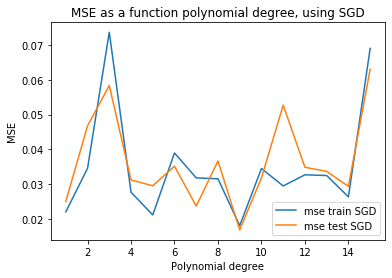

In [10]:
plt.plot(degrees, mse_sgd_train, label = "mse train SGD")
plt.plot(degrees, mse_sgd_test, label = "mse test SGD")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("MSE as a function polynomial degree, using SGD")
plt.legend()
#plt.axis([0, degrees[-1], 0, 2])
plt.plot()

Now we can compare this to the analytical solution $\beta=(X^T X)^{-1} X^T z$:

In [11]:

mse_train = np.zeros(len(degrees))
mse_test = mse_sgd_train.copy()

In [12]:

for i in range(len(degrees)):
    X = X_d(i+1, x, y)
    X_train, X_test, z_train, z_test = train_test_split(X, z)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit(X_train).transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    bet = np.linalg.pinv(X_train.T@X_train)@X_train.T@z_train
    mse_train[i] = np.mean((z_train-X_train@bet)**2)
    mse_test[i] = np.mean((z_test-X_test@bet)**2)

[]

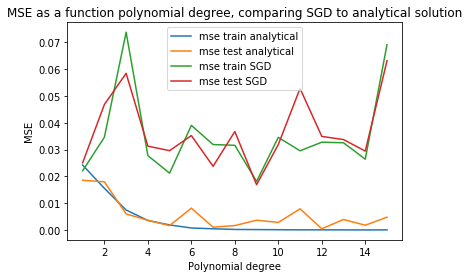

In [13]:
plt.plot(degrees, mse_train, label = "mse train analytical")
plt.plot(degrees, mse_test, label = "mse test analytical")
plt.plot(degrees, mse_sgd_train, label = "mse train SGD")
plt.plot(degrees, mse_sgd_test, label = "mse test SGD")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("MSE as a function polynomial degree, comparing SGD to analytical solution")
plt.legend()
#plt.axis([0, degrees[-1], 0, 2])
plt.plot()

As one would expect, the analytical solution is (for the most part) more precise. But this method (SGD) can be very useful in the cases where an analytical solution to 
\begin{equation}
\frac{\partial C(\beta)}{\partial\beta}=0
\end{equation}
is not known

Now, we want to see how a feed forward neural network stacks up agains OLS:

In [16]:

class NeuralNet:

    def __init__(self, X_data, Y_data, layer_sizes, num_iters, eta, act, g, lam, mini, scaling):

        from sklearn.model_selection import train_test_split
        #Might be a good idea for the user to specify test_size when creating a NeuralNet object, but 
        #I'll leave that for later
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X_data, Y_data, test_size = 0.2)
        
        if scaling == "True":
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            self.X_train = scaler.fit(self.X_train).transform(X_train)
            self.X_test = scaler.transform(X_test) 
        
        self.layer_sizes = layer_sizes
        self.num_iters = num_iters
        self.eta = eta
        #Defining the activation functions, and their derivatives right here. 
        if act == "Sigmoid":
            self.act = lambda x: 1/(1+np.exp(-x))
            self.d_act = lambda x: np.exp(-x)/(1+np.exp(-x))**2
        elif act == "RELU":
            self.act = lambda x: np.maximum(x, 0)
            def d_act(x):
                x[x<=0] = 0
                x[x>0] = 1
                return x
            self.d_act = d_act
        elif act == "Leaky_RELU":
            self.act = lambda x: np.maximum(x, 0.01 * x)
            def d_act(x):
                alpha = 0.01
                dx = np.ones_like(x)
                dx[x < 0] = alpha
                return dx
            self.d_act = d_act
            
        #Variable that can take the value "reg" or "clas". Used to specify whether you want the
        #network to perform regression or classification
        self.g = g
        #Ragularization parameter
        self.lam = lam
        self.mini = mini

    
    def initialize_params(self):
        params = {}
        #initializing the weights and biases with random values
        #Could be nice to be able to specify intial weights and biases as arguments to the __init__ method,
        #but that might be superfluous. Should investigate in detail how initialization affects the NN's learning
        for i in range(1, len(self.layer_sizes)):
            params["weight" + str(i)] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i-1])*0.01
            params["bias" + str(i)] = np.random.randn(self.layer_sizes[i],1)*0.01
        return params

    def feed_forward(self, params, X):
        """
        The X-argument here (in this method) can either be training or test data.
        When training the network, the "model" method will supply this method (feed_forward) with training data
        """
        layers = len(params)//2
        values = {}
        

        for i in range(1, layers+1):
            #feeding data to the input layer
            if i==1:
                #input to node
                values["z" + str(i)] = np.dot(params["weight" + str(i)], X.T) + params["bias" + str(i)]
                #activating node
                values["a" + str(i)] = self.act(values["z" + str(i)])

            #feeding forward to next layer(s)
            else:
                values["z" + str(i)] = np.dot(params["weight" + str(i)], values["a" + str(i-1)]) + params["bias" + str(i)]
                #In the regression case: output values are equal to the input in the output layer
                if i==layers and self.g == "reg":
                    values["a"+ str(i)] = values["z" + str(i)]
                #In the classification case: output values are probabilities of correct prediction
                elif i==layers and self.g == "clas":
                    a = self.act(values["z" + str(i)])
                    exp_term = np.exp(a)
                    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
                    values["a" + str(i)] = probabilities
                #The activation is equal in both regression and classification, but
                #one should test the different ones for the best case use
                else:
                    values["a" + str(i)] = self.act(values["z" + str(i)])
        return values

    def backprop(self, params, values):
        layers = len(params)//2
        m = len(self.Y_train)
        grads = {}
        #In the regression case:
        if self.g == "reg":
            #Starting at the output layer, going back
            for i in range(layers,0,-1):
                #Finding MSE of output layer
                #Might add different cost function options
                if i==layers:
                    dA = 1/m * np.sum((values["a" + str(i)] - self.Y_train)**2, axis=0, keepdims = True)
                    dZ = dA
                #Propage error backward
                else:
                    dA = np.dot(params["weight" + str(i+1)].T, dZ)
                    dZ = np.multiply(dA, self.d_act(values["a" + str(i)]))
                #If at input layer
                if i==1:
                    grads["weight" + str(i)] = 1/m*np.dot(dZ, self.X_train)
                    #Regularization term. If lam = 0: no regularization
                    grads["weight" + str(i)] += self.lam * params["weight" + str(i)]
                    grads["bias" + str(i)] = 1/m*np.sum(dZ, axis=1, keepdims=True)
                #Else at hidden hidden layer
                else:
                    grads["weight" + str(i)] = 1/m*np.dot(dZ,values["a" + str(i-1)].T)
                    #Regularization term.
                    grads["weight" + str(i)] += self.lam * params["weight" + str(i)]
                    grads["bias" + str(i)] = 1/m*np.sum(dZ, axis=1, keepdims=True)

            return grads

        #In the classification case:
        elif self.g == "clas":
            for i in range(layers,0,-1):
                #First: calculate output error.
                if i==layers:
                    dA = values["a" + str(i)] - self.Y_train.T
                    dZ = dA
                #Propagate error backwards through layers
                else:
                    dA = np.dot(params["weight" + str(i+1)].T, dZ)
                    dZ = dA @ self.act(values["a" + str(i)]).T@(1-self.act(values["a" + str(i)]))
                #Input layer
                if i==1:
                    grads["weight" + str(i)] = np.dot(dZ, self.X_train)
                    #Regularization term.
                    grads["weight" + str(i)] += self.lam * params["weight" + str(i)]
                    grads["bias" + str(i)] = np.sum(dZ, axis=1, keepdims=True)
                #Hidden layer(s) if any
                else:
                    grads["weight" + str(i)] = np.dot(dZ,values["a" + str(i-1)].T)
                    #Regularization term.
                    grads["weight" + str(i)] += self.lam * params["weight" + str(i)]
                    grads["bias" + str(i)] = np.sum(dZ, axis=1, keepdims=True)
            return grads

    def update_params(self, params, grads):
        layers = len(params)//2
        params_updated = {}
        #Updating the weights and biases by gradient descent
        for i in range(1,layers+1):
            params_updated["weight" + str(i)] = params["weight" + str(i)] - self.eta * grads["weight" + str(i)]
            params_updated["bias" + str(i)] = params["bias" + str(i)] - self.eta * grads["bias" + str(i)]
        return params_updated

    def model(self):
        params = NeuralNet.initialize_params(self)
        #if using mini-batches:
        min = mini[0]

        if min == True:
            
            data_indices = len(self.X_train)
            #Batch size as specified in the mini list argument
            batch_size = int(self.mini[1])
            #Number of epochs as specified in the mini list argument
            epochs = int(self.mini[2])

            for k in range(epochs):
                acs = np.zeros(self.num_iters)
                for i in range(self.num_iters):
                    #Getting the accuracy/ error to check for overfitting
                    train_acc, test_acc = NeuralNet.compute_accuracy(self, params)
                    acs[i] = test_acc
                    #Creating mini-batch incdices for the design/ feature matrix and targets
                    #Might be a problem that we risk drawing same samples multiple times during one epoch. Don't know
                    chosen_datapoints = np.random.choice(data_indices, size=batch_size, replace=False)
                    #Creating a mini-batch
                    X = self.X_train[chosen_datapoints]
                    Y = self.Y_train[chosen_datapoints]

                    #Train on mini batch
                    values = NeuralNet.feed_forward(self, params, self.X_train)
                    #Propagate error
                    grads = NeuralNet.backprop(self, params, values)
                    #Update weights and biases
                    params = NeuralNet.update_params(self, params, grads)
                    #In case of overfitting. Sloppy fix. Needs replacements.
                    if i>=1 and acs[i]>acs[i-1]:
                        break
                    #Might use if i>=1 and abs(acs[i]-acs[i-1]>some_value:
                        #break
                    #Would need testing. Reluctant to introduce another adjustable parameter.

        elif min == False:
            #Training the netowrk
            for i in range(self.num_iters):
                values = NeuralNet.feed_forward(self, params, self.X_train)
                grads = NeuralNet.backprop(self, params, values)
                params = NeuralNet.update_params(self, params, grads)

        return params

    def compute_accuracy(self, params):

        #Getting network's predictions from the test and training data
        values_train = NeuralNet.feed_forward(self, params, self.X_train)
        values_test = NeuralNet.feed_forward(self, params, self.X_test)

        #In the case of regression we use MSE as a measure of error
        #Might update to allow different cost functions

        if self.g == "reg":
            train_acc = np.mean((self.Y_train - values_train["a" + str(len(layer_sizes)-1)].T)**2)
            test_acc = np.mean((self.Y_test - values_test["a" + str(len(layer_sizes)-1)].T)**2)
            return train_acc, test_acc
        #In the case of classification we use percentage/100 of correctly predicted values
        elif self.g == "clas":
            train_acc = 0
            for i in range(len(self.Y_train)):
                #Finding the true value
                true = np.argmax(self.Y_train[i])
                #Finding training value with highest probability
                pred = np.argmax(values_train["a" + str(len(layer_sizes)-1)].T[i])

                if true == pred:
                    train_acc += 1
                else:
                    continue
            #percentage of correct predictions (divided by 100)
            train_acc /= len(self.Y_train)

            #Test accuracy
            #Same as for the training error/ accuracy
            test_acc = 0
            for i in range(len(self.Y_test)):
                true = np.argmax(self.Y_test[i])
                pred = np.argmax(values_test["a" + str(len(layer_sizes)-1)].T[i])
                if true == pred:
                    test_acc += 1
                else:
                    continue
            test_acc /= len(self.Y_test)

            return train_acc,  test_acc

    def predict(self, x):
        params = NeuralNet.model(self)
        feed = NeuralNet.feed_forward(self, params, x)
        if self.g == "clas":
            
            pred = np.argmax(feed["a" + str(len(self.layer_sizes)-1)][-1])
            
            return pred
        elif self.g == "reg":
            pred = feed["a" + str(len(self.layer_sizes)-1)]
            return pred



Now, we can use this network to perform regression.

In [131]:
mse_train = np.zeros(len(degrees))
mse_test = mse_sgd_train.copy()

num_iters = 1000
eta = 10**(-4)
act = "Sigmoid"
g = "reg"
lam = 0.01
mini = [False]

for i in range(len(degrees)):
    X = X_d(i+1, x, y)
    h = len(X[0])
    layer_sizes = [h, h//2, 1]
    
    Network = NeuralNet(X, z, layer_sizes, num_iters, eta, act, g, lam, mini, scaling = True)
    #X_data, Y_data, layer_sizes, num_iters, eta, act, g, lam, mini
    params = Network.model()
    mse_train[i], mse_test[i] = Network.compute_accuracy(params)
    


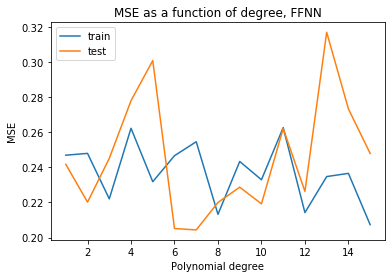

In [133]:
plt.plot(degrees, mse_train, label = "train")
plt.plot(degrees, mse_test, label = "test")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("MSE as a function of degree, FFNN")
plt.legend()
plt.show()

This is naturally just one of many possible results. The network is dependent upon many hyper parameters, and we could, if we wanted, search for the best ones. But this is more proof-of-concept, than model optimizing. 

Now that we have a working NN, we can also use it for classification. We choose to work on the MNIST dataset (http://yann.lecun.com/exdb/mnist/).

In [17]:
from sklearn import datasets



# ensure the same random numbers appear every time
np.random.seed(0)

# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target


num_iters = 5000
eta = 10e-6
#activation function. Choose between "Sigmoid", "RELU", and "Leaky_RELU"
act = "Sigmoid"
#g = "reg" means regression. g="clas" means classification
g = "clas"
#regularization parameter
lam = 0.01
#Whether to use mini-batches. mini = [True/ False, n_batches, n_epochs]
#If no mini-batch: mini = [False]
mini = [False]


print(labels)


[0 1 2 ... 8 9 8]


Since the labels are just a list of values from 0 to 9, we can make use of one-hot encoding on labels:

In [18]:
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1

    return onehot_vector




In [19]:
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
X = inputs
Y = to_categorical_numpy(labels)
#Number of input nodes. Must match number of features in X
in_size = len(X[0])
#Size of output layer of neural netfork
out_size = len(Y[0])
#Again: leave mini-batch at False. Please, for the love of GOD do not set it to TRUE
mini = [False, 10, 500]
layer_sizes = [in_size, out_size]
#Architecture the was found (by trial and error) to best work in this with this data
#layer_sizes = [input_layer, hidden_layer_1, ..., hidden_layer_n, outputlayer]

#List of possible activation functions
funcs = ["Sigmoid", "RELU", "Leaky_RELU"]

Network = NeuralNet(X, Y, layer_sizes, num_iters, eta, act, g, lam, mini, False)
#X_data, Y_data, layer_sizes, num_iters, eta, act, g, lam, mini
params = Network.model()


In [20]:
ac1, ac2 = Network.compute_accuracy(params)
print("training accuracy = %f" %ac1)
print("test accuracy = %f" %ac2)



training accuracy = 0.990953
test accuracy = 0.961111


A fairly good result, if I may so so myself. Could possibly be improved.

[1] https://github.com/magnuhag/Prosjekt1_fys-stk-3155/blob/master/Project%201%20FYS.pdf
<br>
[2] https://en.wikipedia.org/wiki/Newton%27s_method
<br>
[3] https://github.com/CompPhysics/MachineLearning/blob/master/doc/pub/week40/ipynb/week40.ipynb
<br>
[4] https://github.com/CompPhysics/MachineLearning/blob/master/doc/pub/week41/ipynb/week41.ipynb
<br>
[5] https://adventuresinmachinelearning.com/stochastic-gradient-descent/

